<a href="https://colab.research.google.com/github/Dh0t/NLP/blob/main/one_to_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Shape of X: (100, 1, 1)
Shape of y: (100, 1)


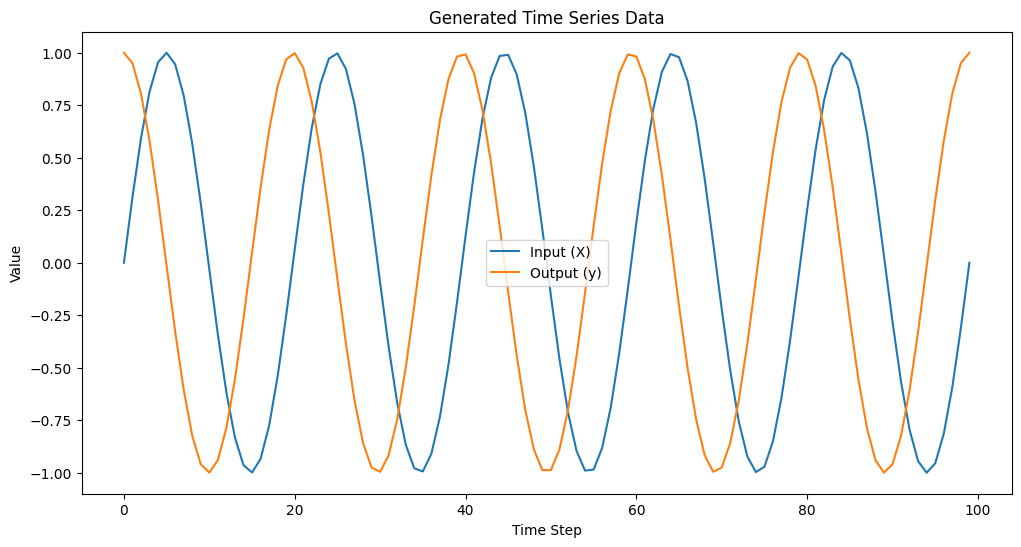

In [3]:
# 1. Buat urutan data input (X) dan output (y) time series sederhana menggunakan NumPy.
# Generate a simple time series: a sine wave
n_samples = 100
time_steps = 1
n_features = 1

X = np.sin(np.linspace(0, 10 * np.pi, n_samples)).reshape(n_samples, time_steps, n_features)
y = np.cos(np.linspace(0, 10 * np.pi, n_samples)).reshape(n_samples, 1) # Predict the next value or a related value (cosine in this case)

# 2. Pastikan format data sesuai untuk input ke model RNN one-to-one.
# The data is already in the shape [jumlah_sampel, langkah_waktu, fitur] as required for one-to-one RNN.

# 3. Bagi data menjadi set pelatihan dan pengujian jika diperlukan.
# For this simple example, we'll use the whole dataset for training and evaluation.
# In a real-world scenario, you would typically split the data.
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the generated data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Plot the generated data
plt.figure(figsize=(12, 6))
plt.plot(X[:, 0, 0], label='Input (X)')
plt.plot(y[:, 0], label='Output (y)')
plt.title('Generated Time Series Data')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 2. Create a Sequential model.
model = Sequential()

# 3. Add a SimpleRNN layer to the model.
# Specify the number of units (e.g., 32).
# Set return_sequences=False for a one-to-one model.
# input_shape should be (time_steps, n_features).
model.add(SimpleRNN(units=32, return_sequences=False, input_shape=(time_steps, n_features)))

# 4. Add a Dense layer as the output layer.
# The number of units should match the output dimension (1).
model.add(Dense(units=1))

# 5. Print the model summary to review the architecture.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# 1. Compile the defined Keras model.
# 2. Specify the optimizer (e.g., 'adam').
# 3. Specify the loss function suitable for regression (e.g., 'mean_squared_error').
# 4. Optionally, specify metrics to monitor during training (e.g., ['mae'] for Mean Absolute Error).
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [6]:
# 1. Train the compiled Keras model using the fit() method.
# 2. Provide the input data X and the output data y to the fit() method.
# 3. Specify the number of training epochs (e.g., 100).
epochs = 100
# 4. Optionally, specify the batch size for training.
batch_size = 32
# 5. Optionally, use a validation split or validation data to monitor performance during training.
# We will use a validation split for this example.
validation_split = 0.2

history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

# 6. Store the training history (returned by the fit() method) in a variable for later analysis and visualization.
# The history is already stored in the 'history' variable.

print("Training finished.")

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 0.5448 - mae: 0.6674 - val_loss: 0.5140 - val_mae: 0.6475
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4799 - mae: 0.6183 - val_loss: 0.5101 - val_mae: 0.6437
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.5090 - mae: 0.6363 - val_loss: 0.5073 - val_mae: 0.6398
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4978 - mae: 0.6338 - val_loss: 0.5055 - val_mae: 0.6361
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5122 - mae: 0.6523 - val_loss: 0.5049 - val_mae: 0.6365
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.5174 - mae: 0.6518 - val_loss: 0.5049 - val_mae: 0.6383
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5178 - mae: 0.6494 - val_loss: 0.5051 - val_mae: 0.6394
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5228 - mae: 0.6559 - val_loss: 0.5053 - val_mae: 0.6401
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4910 - mae:

In [7]:
# Use the trained model to make predictions on the input data X.
y_pred = model.predict(X)

# If a separate test set (X_test, y_test) was created, evaluate the model's performance on the test set.
# In this specific case, we did not create a separate test set, so we will skip the evaluation step on a test set.
# If X_test and y_test were available, the code would look like this:
# if 'X_test' in locals() and 'y_test' in locals():
#     print("\nEvaluating model on the test set...")
#     loss, mae = model.evaluate(X_test, y_test, verbose=0)
#     print(f"Test Loss: {loss:.4f}")
#     print(f"Test MAE: {mae:.4f}")
# else:
#     print("\nNo separate test set created for evaluation.")

# Print the shape of the predictions to confirm.
print("\nShape of predictions (y_pred):", y_pred.shape)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Shape of predictions (y_pred): (100, 1)


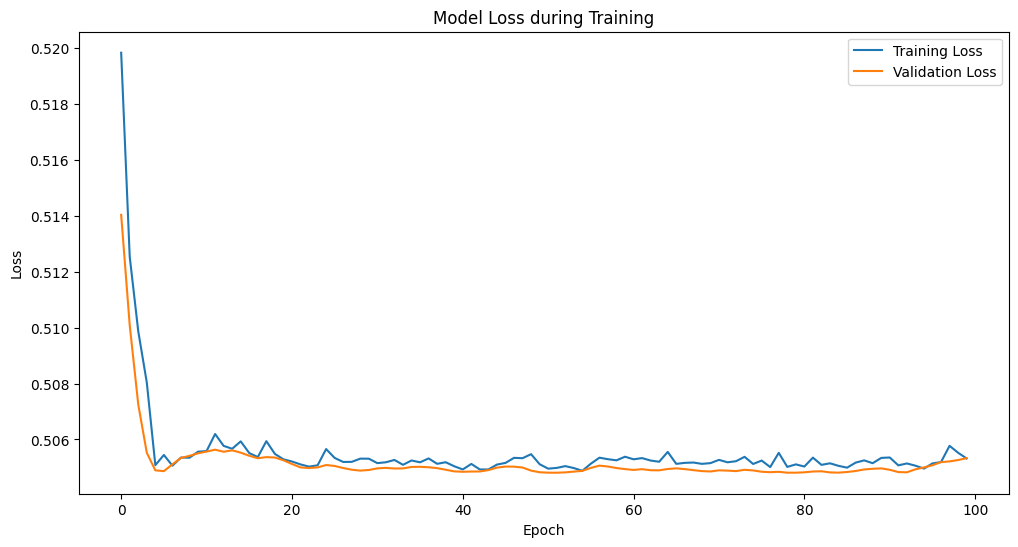

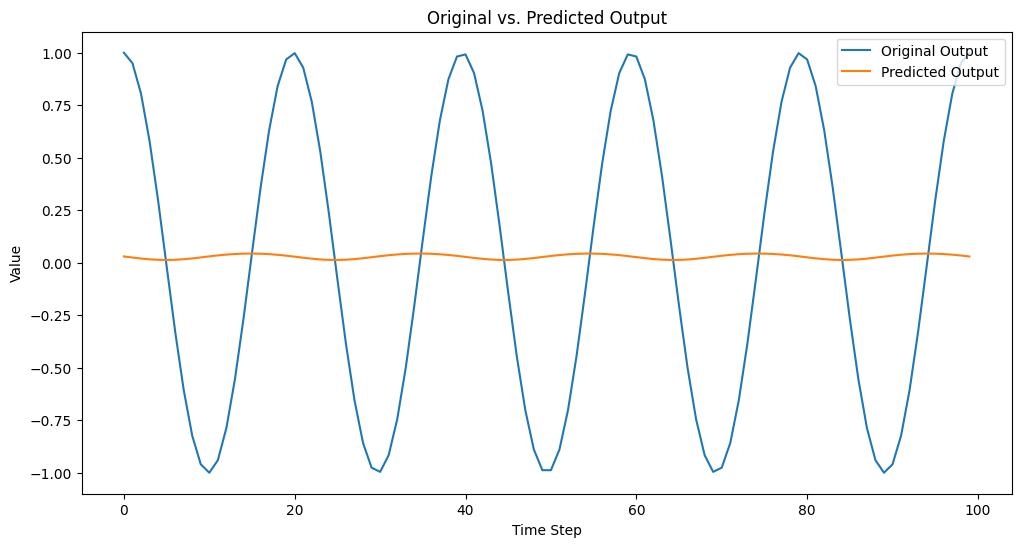

In [8]:
# 1-5: Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 6-11: Plot original vs. predicted output
plt.figure(figsize=(12, 6))
plt.plot(y, label='Original Output')
plt.plot(y_pred, label='Predicted Output')
plt.title('Original vs. Predicted Output')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()